<a href="https://colab.research.google.com/github/2303A52013/GenAI/blob/main/HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from seaborn import heatmap
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dropout

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/GenAi/heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


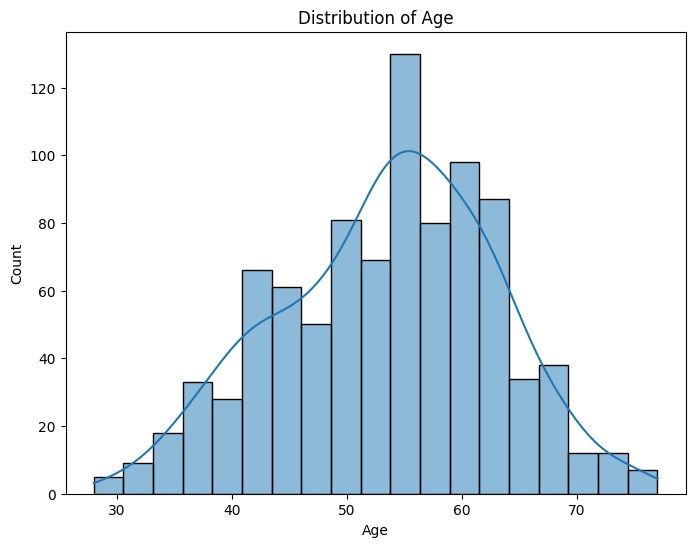

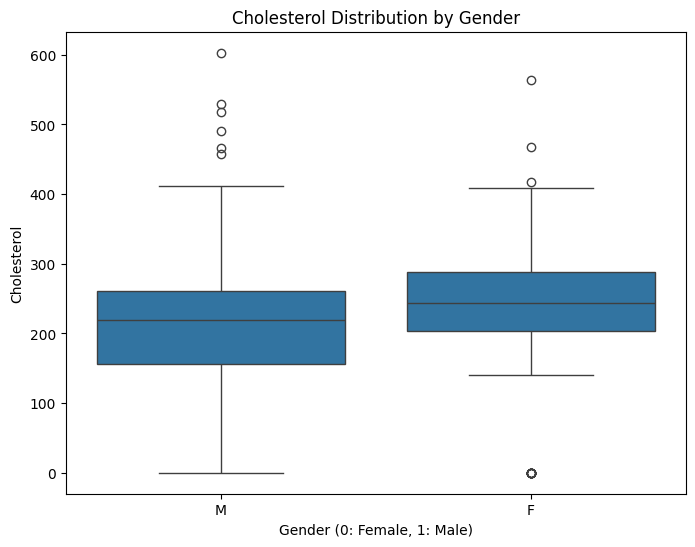

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Age
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Box plot for Cholesterol by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Cholesterol', data=data)
plt.title('Cholesterol Distribution by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Cholesterol')
plt.show()

# You can create similar plots for other features like 'RestingBP', 'MaxHR', etc.

In [ ]:
le = LabelEncoder()
for column in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    data[column] = le.fit_transform(data[column])

In [ ]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [ ]:
data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [ ]:
data.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(x)
X

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
         0.10566353, -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
         0.29328271, -0.59607813],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
        -0.83243239, -0.59607813],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.83243239,  1.05211381]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(18, activation='swish'))
model.add(Dropout(0.2))  # Add dropout after the first Dense layer
model.add(Dense(26, activation='swish'))
model.add(Dropout(0.2))  # Add dropout after the second Dense layer
model.add(Dense(20, activation='swish'))
model.add(Dropout(0.2))  # Add dropout after the third Dense layer
model.add(Dense(15, activation='swish'))
model.add(Dropout(0.2))  # Add dropout after the fourth Dense layer
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 18)             │           216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 18)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 26)             │           494 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 26)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 20)             │           540 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 15)             │           315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,581 (6.18 KB)

 Trainable params: 1,581 (6.18 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
training = model.fit(x_train, y_train, epochs=350, batch_size=16)

Epoch 1/350
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6312 - loss: 0.6705
Epoch 2/350
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7595 - loss: 0.5849
Epoch 3/350
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8009 - loss: 0.4554
Epoch 4/350
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8554 - loss: 0.3980
Epoch 5/350
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8262 - loss: 0.4151
Epoch 6/350
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8627 - loss: 0.3562
Epoch 7/350
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8226 - loss: 0.4147
Epoch 8/350
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8509 - loss: 0.3704
Epoch 9/350
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8509 - loss: 0.3701
Epoch 10/350
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8705 - loss: 0.3378
Epoch 11/350
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8413 - loss: 0.3557
Epoch 12/350
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [ ]:
Adam_y_train_pred = model.predict(x_train)
Adam_y_test_pred = model.predict(x_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [ ]:
y_pred = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [ ]:
y_pred_classes = (y_pred > 0.5).astype(int)

In [ ]:
CM = confusion_matrix(y_test, y_pred_classes)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

Accuracy: 0.8804347826086957


In [ ]:
print("ANN(Adam) Classification report:\n",classification_report(y_test, y_pred_classes))

ANN(Adam) Classification report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86        77
           1       0.92      0.87      0.89       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



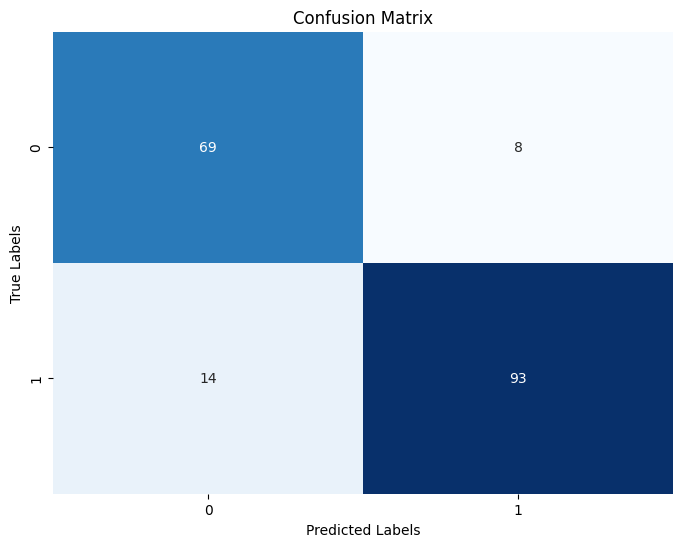

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# **SVM**

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
svm_y_pred = svm.predict(x_test)
svm_accuracy_score = accuracy_score(y_test, svm_y_pred)
svm_accuracy_score

0.8641304347826086

In [ ]:
print("SVM Classification report:\n",classification_report(y_test, svm_y_pred))

SVM Classification report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



# **Logistic regression**

In [ ]:
from math import log
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_y_pred = logreg.predict(x_test)
logreg_accuracy_score = accuracy_score(y_test, logreg_y_pred)
logreg_accuracy_score

0.8478260869565217

In [ ]:
print("Logistic regression Classification report:\n",classification_report(y_test, logreg_y_pred))

Logistic regression Classification report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



# **XG Boost**

In [ ]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(x_train, y_train)
xgb_y_pred = xgb_classifier.predict(x_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print("XGBoost Accuracy:", xgb_accuracy)

XGBoost Accuracy: 0.8695652173913043


In [ ]:
print("XG Boost Classification report:\n",classification_report(y_test, xgb_y_pred))

XG Boost Classification report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        77
           1       0.92      0.85      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)  # Initialize
rf_classifier.fit(x_train, y_train)  # Train
rf_y_pred = rf_classifier.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)
print("\n Classification report:\n",classification_report(y_test, rf_y_pred))

Random Forest Accuracy: 0.8804347826086957

 Classification report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [ ]:
accuracy_scores = {
    "Neural Network (Adam)": accuracy,
    "SVM": svm_accuracy_score,
    "Logistic Regression": logreg_accuracy_score,
    "XGBoost": xgb_accuracy,
    "Random Forest": rf_accuracy
}

# Create a pandas DataFrame from the dictionary
df = pd.DataFrame.from_dict(accuracy_scores, orient='index', columns=['Accuracy'])

# Display the table
display(df)

,Accuracy
Neural Network (Adam),0.880435
SVM,0.864130
Logistic Regression,0.847826
XGBoost,0.869565
Random Forest,0.880435


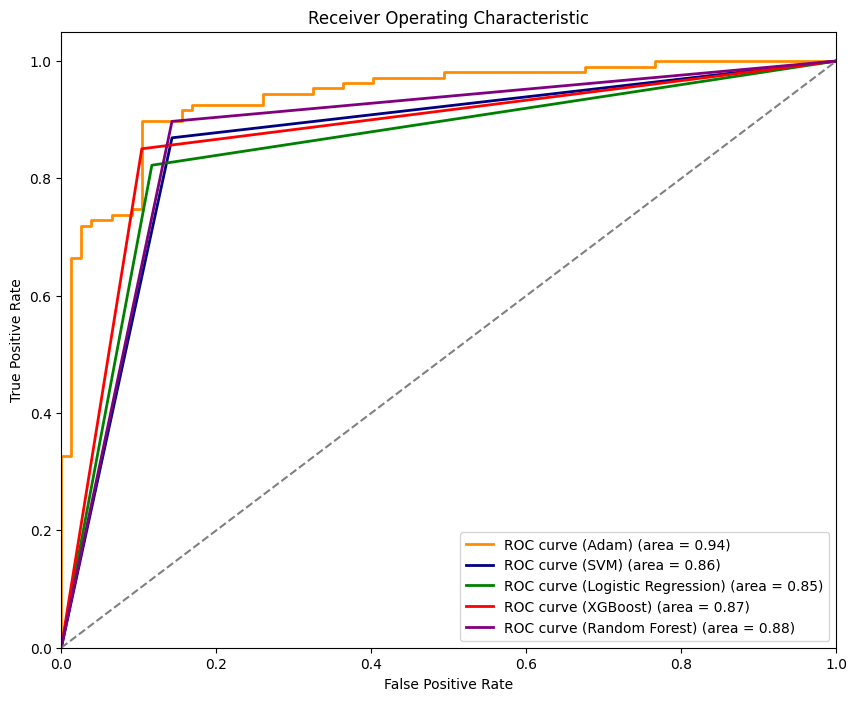

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC for each model
fpr_adam, tpr_adam, thresholds_adam = roc_curve(y_test, y_pred)
roc_auc_adam = auc(fpr_adam, tpr_adam)

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_y_pred)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, logreg_y_pred)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_y_pred)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_y_pred)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_adam, tpr_adam, color='darkorange', lw=2, label='ROC curve (Adam) (area = %0.2f)' % roc_auc_adam)
plt.plot(fpr_svm, tpr_svm, color='navy', lw=2, label='ROC curve (SVM) (area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_logreg, tpr_logreg, color='green', lw=2, label='ROC curve (Logistic Regression) (area = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label='ROC curve (XGBoost) (area = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_rf, tpr_rf, color='purple', lw=2, label='ROC curve (Random Forest) (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#model.save('HeartDiseasePrediction.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Save the model
#model.save('HeartDiseasePrediction.keras')

# To load it later
loaded_model = load_model('HeartDiseasePrediction.h5')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

column_names = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

sample_data = [[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0],
               [37, 1, 2, 130, 250, 0, 1, 187, 0, 3.5, 0],
               [41, 0, 1, 130, 204, 0, 0, 172, 0, 1.4, 2]]

test_df = pd.DataFrame(sample_data, columns=column_names)

# Optional: Preprocessing (if needed)
scaler = StandardScaler()  # Replace with your preprocessing steps
X_test = scaler.fit_transform(test_df)

# Make predictions
predictions = loaded_model.predict(X_test)  # Assuming 'loaded_model' is loaded

predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


array([[0.96113414],
       [0.63185674],
       [0.04284748]], dtype=float32)